In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=30, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=16, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=17, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=22, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
# debug_mode = True
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-08-05 21:15:22.601759: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-39f51a97-dc19-4b77-bc9f-f4ac7dd9a1f0.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('bottle0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]),
                           Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]),
                           Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]),
                           Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188])]}),
             ('panda_gripper', {'holding': None})])
***************************************************************

****************

In [2]:
rearrangement1.init_scene._support_objects

{'table': <trimesh.Trimesh(vertices.shape=(32, 3), faces.shape=(48, 3))>}

In [3]:
rearrangement1.scene_mngr.scene.benchmark_config

{0: {'object_names': ['ben_cube0', 'bottle0', 'can0', 'cereal0'],
  'goal_scene': {'table': array([[ 1.   ,  0.   ,  0.   ,  0.9  ],
          [ 0.   ,  1.   ,  0.   , -0.6  ],
          [ 0.   ,  0.   ,  1.   ,  0.043],
          [ 0.   ,  0.   ,  0.   ,  1.   ]]),
   'ben_cube0': array([[ 0.45999483,  0.8879216 ,  0.        ,  0.47189415],
          [-0.8879216 ,  0.45999483,  0.        , -0.22862241],
          [ 0.        ,  0.        ,  1.        ,  0.83529998],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   'bottle0': array([[ 0.46694576, -0.88428596,  0.        ,  0.40412951],
          [ 0.88428596,  0.46694576,  0.        , -0.10179989],
          [ 0.        ,  0.        ,  1.        ,  0.87515735],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   'can0': array([[-0.97112962,  0.23855241,  0.        ,  0.6645213 ],
          [-0.23855241, -0.97112962,  0.        , -0.10141758],
          [ 0.        ,  0.        ,  1.        ,  0.8505

In [4]:
# rearrangement1.scene_mngr.scene.objs['ben_cube0'].h_mat  =  list(mcts.rearr_action.get_arbitrary_location('ben_cube0', support_obj_name='ben_cube_support',scene_for_sample=mcts.init_scene, sample_num= 1))[0]['ben_cube_support']

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]), 'bottle0': Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]), 'can0': Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]), 'cereal0': Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188])}


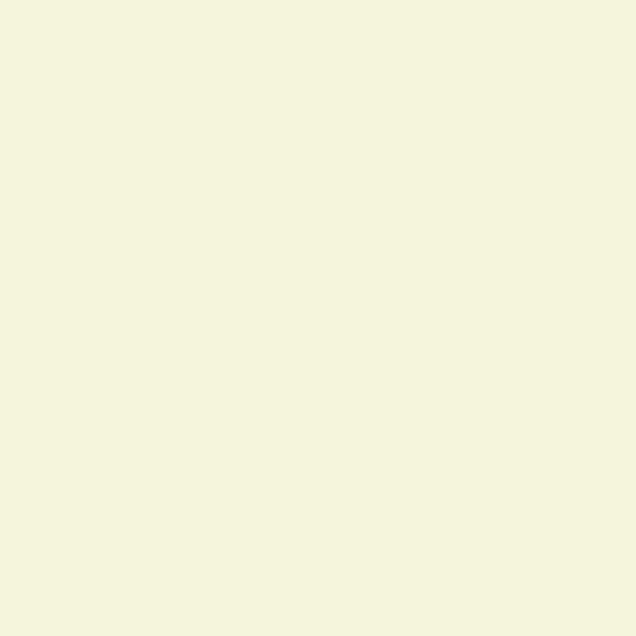

In [2]:
# #######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# goal_scene
# rearrangement1.goal_scene_mngr.render_scene(ax)
# rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
# rearrangement1.goal_scene_mngr.show()

In [2]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=False,
        use_pick_action=False,
        consider_next_scene=True, 
    )
mcts.only_optimize_1 = False

2023-08-05 21:15:24.326942: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-08-05 21:15:24.354536: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-05 21:15:24.354605: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-05 21:15:24.354624: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-08-05 21:15:24.356088: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-05 21:15:24.356131: I tensorflow/stream_executor/plat

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-08-05 21:15:26.489119: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 21:15:26.490552: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-05 21:15:26.490632: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-05 21:15:26.490679: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-05 21:15:26.775278: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-05 21:15:26.775299: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-08-05 21:15:26.775303: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-08-05 21:15:26.775497: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-05 21:15:26.775589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-05 21:15:26.775640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [3]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 1 ===========
[Action] Rearr can0 to table
placed another place not goal
[Reward] S(0) -> A(5) -> S'(8) Reward : -1
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(8) -> A(11) -> S'(15) Reward : -1
[Action] Rearr can0 to table
Good Action
[Reward] S(15) -> A(19) -> S'(22) Reward : 2.5
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(22) -> A(25) -> S'(28) Reward : -1
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(28) -> A(29) -> S'(34) Reward : -1
[Action] Rearr bottle0 to table
Good Action
[Reward] S(34) -> A(36) -> S'(39) Reward : 1.429
[Action] Rearr can0 to table
Bad Action
[Reward] S(39) -> A(42) -> S'(45) Reward : -2.857
[Action] Rearr bottle0 to table
Bad Action
[Reward] S(45) -> A(48) -> S'(50) Reward : -2.5
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(50) -> A(55) -> S'(57) Reward : -1


2023-08-05 21:15:29.496026: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-08-05 21:15:29.863837: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-08-05 21:15:30.405658: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-05 21:15:30.716562: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


Generated 9 grasps for object ben_cube0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0048 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0016 sec

can0
Extracted Region Cube Size:  0.4
Generated 12 grasps for object can0
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (72, 4, 4)
Collision free grasps step 3 :  (12, 4, 4)
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0064 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

cereal0
Extracted Region Cube Size:  0.4
Generated 94 grasps for object cereal0
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0037 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

ben_cube0
Extracted Region Cube Size: 

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Generated 75 grasps for object cereal0
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0059 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

pick ben_cube0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0047 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.948
WorkingTime[run]: 3.3755 sec

WorkingTime[run]: 0.0505 sec

WorkingTime[run]: 0.0511 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 1.964
WorkingTime[run]: 4.5791 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0096 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.811
WorkingTime[run]: 4.3161 sec

WorkingTime[run]: 0.0515 sec

WorkingTime[run]: 0.0656 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 1.839
WorkingTime[run]: 3.2236 sec

Success pnp
pick can0
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0067 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.818
WorkingTime[run]: 3.2910 sec

WorkingTime[run]: 0.0500 sec

WorkingTime[run]: 0.0518 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.885
WorkingTime[run]: 4.4782 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0059 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0040 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0040 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0105 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0035 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0066 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0086 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0079 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0079 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0076 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0048 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematic

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Iterators : 15
WorkingTime[inverse_kinematics]: 0.0076 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0065 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0072 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0055 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0056 sec

solve with LM1
Iterators : 29
WorkingTime[inverse_kinematics]: 0.0134 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0065 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0102 sec

solve with LM1
Iterators : 26
WorkingTime[inverse_kinematics]: 0.0120 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 4.129
WorkingTime[run]: 4.6089 sec

WorkingTime[run]: 0.0504 sec

WorkingTime[run]: 0.0520 sec

rewire
rewire
rewire
rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 4.245
WorkingTime[run]: 3.2232 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0038 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.223
WorkingTime[run]: 3.4272 sec

WorkingTime[run]: 0.0492 sec

WorkingTime[run]: 0.0523 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 1.432
WorkingTime[run]: 4.4386 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0039 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.183
WorkingTime[run]: 4.2508 sec

WorkingTime[run]: 0.0514 sec

WorkingTime[run]: 0.0675 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Cost is 1.212
WorkingTime[run]: 3.2179 sec

Success pnp
pick ben_cube0
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0063 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.769
WorkingTime[run]: 3.3152 sec

WorkingTime[run]: 0.0497 sec

WorkingTime[run]: 0.0491 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 2.955
WorkingTime[run]: 4.4482 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0045 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.957
WorkingTime[run]: 4.0977 sec

WorkingTime[run]: 0.0513 sec

WorkingTime[run]: 0.0501 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 1.989
WorkingTime[run]: 3.1508 sec

Success pnp
pick can0
solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0079 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0084 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0063 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0053 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 12 --> 110
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.81
WorkingTime[run]: 3.2651 sec

WorkingTime[run]: 0.0506 sec

WorkingTime[run]: 0.0475 sec

rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.673
WorkingTime[run]: 4.4592 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0074 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 9 --> 80
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.081
WorkingTime[run]: 4.2848 sec

WorkingTime[run]: 0.0512 sec

WorkingTime[run]: 0.0514 sec

rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 3.4
WorkingTime[run]: 3.1331 sec

Success pnp
pick ben_cube0
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0056 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.139
WorkingTime[run]: 3.2219 sec

WorkingTime[run]: 0.0507 sec

WorkingTime[run]: 0.0510 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.528
WorkingTime[run]: 4.4442 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0078 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.005
WorkingTime[run]: 4.2769 sec

WorkingTime[run]: 0.0501 sec

WorkingTime[run]: 0.0504 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.037
WorkingTime[run]: 3.0720 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0062 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0063 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0102 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0075 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0101 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0092 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0043 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0061 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0097 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0065 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0087 sec

solve with LM1
Iterators : 11
Wo

[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.976
WorkingTime[run]: 3.3888 sec

WorkingTime[run]: 0.0489 sec

WorkingTime[run]: 0.0473 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 4.032
WorkingTime[run]: 4.4242 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0058 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.905
WorkingTime[run]: 4.2900 sec

WorkingTime[run]: 0.0526 sec

WorkingTime[run]: 0.0545 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.021
WorkingTime[run]: 3.2601 sec

Success pnp
pick bottle0
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0063 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.143
WorkingTime[run]: 3.3805 sec

WorkingTime[run]: 0.0483 sec

WorkingTime[run]: 0.0497 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.157
WorkingTime[run]: 4.3373 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0055 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0062 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0088 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0070 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0087 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0068 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0098 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0059 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0078 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0070 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0094 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0065 sec

solve with LM1
Iterators : 34
WorkingTime[inverse_kinema

[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.45
WorkingTime[run]: 4.4440 sec

WorkingTime[run]: 0.0513 sec

WorkingTime[run]: 0.0509 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


rewire
rewire
rewire
Cost is 3.671
WorkingTime[run]: 3.1028 sec

Success pnp
pick can0
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0055 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.213
WorkingTime[run]: 3.1481 sec

WorkingTime[run]: 0.0507 sec

WorkingTime[run]: 0.0516 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 11 --> 100
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.288
WorkingTime[run]: 4.4491 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0049 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.859
WorkingTime[run]: 4.2477 sec

WorkingTime[run]: 0.0518 sec

WorkingTime[run]: 0.0510 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 1.905
WorkingTime[run]: 3.1319 sec

Success pnp
pick ben_cube0
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0076 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0053 sec

solve with LM1
Iterators : 34
WorkingTime[inverse_kinematics]: 0.0155 sec

solve with LM1
Iterators : 35
WorkingTime[inverse_kinematics]: 0.0159 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.125
WorkingTime[run]: 3.3386 sec

WorkingTime[run]: 0.0503 sec

WorkingTime[run]: 0.0481 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 3.177
WorkingTime[run]: 4.6133 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0057 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.563
WorkingTime[run]: 4.4700 sec

WorkingTime[run]: 0.0524 sec

WorkingTime[run]: 0.0511 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.689
WorkingTime[run]: 3.2413 sec

Success pnp
pick can0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0052 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.142
WorkingTime[run]: 3.2376 sec

WorkingTime[run]: 0.0478 sec

WorkingTime[run]: 0.0491 sec

rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.015696


Cost is 2.095
WorkingTime[run]: 4.5837 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.026902
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.085309
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.694
WorkingTime[run]: 4.4047 sec

WorkingTime[run]: 0.0486 sec

WorkingTime[run]: 0.0471 sec

rewire
rewire
rewire
rewire
rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.285
WorkingTime[run]: 3.1777 sec

Success pnp
pick bottle0
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0086 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.308
WorkingTime[run]: 3.3101 sec

WorkingTime[run]: 0.0488 sec

WorkingTime[run]: 0.0509 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.28
WorkingTime[run]: 4.4340 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0070 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0052 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0090 sec

solve with LM1
Iterators : 27
WorkingTime[inverse_kinematics]: 0.0126 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0115 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0079 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 22 --> 210
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 5.142
WorkingTime[run]: 4.4847 sec

WorkingTime[run]: 0.0516 sec

WorkingTime[run]: 0.0520 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 8 --> 70
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 5.303
WorkingTime[run]: 3.3706 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0083 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0070 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0048 sec

solve with LM1
Iterators : 27
WorkingTime[inverse_kinematics]: 0.0124 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0078 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 4.782
WorkingTime[run]: 3.1869 sec

WorkingTime[run]: 0.0515 sec

WorkingTime[run]: 0.0495 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 4.829
WorkingTime[run]: 4.4396 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0095 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0060 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0075 sec

solve with LM1
Iterators : 36
WorkingTime[inverse_kinematics]: 0.0162 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0081 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0048 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0064 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0081 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0059 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0055 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0073 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 33
WorkingTime[inverse_kinema

[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.963
WorkingTime[run]: 4.5630 sec

WorkingTime[run]: 0.0469 sec

WorkingTime[run]: 0.0496 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 4.28
WorkingTime[run]: 3.1426 sec

Success pnp
pick bottle0
solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0084 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0118 sec

solve with LM1
Iterators : 27
WorkingTime[inverse_kinematics]: 0.0126 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0103 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0098 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0092 sec

solve with LM1
Iterators : 36
WorkingTime[inverse_kinematics]: 0.0162 sec

solve with LM1
Iterators : 26
WorkingTime[inverse_kinematics]: 0.0117 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0088 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 8 --> 70
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.808
WorkingTime[run]: 3.3590 sec

WorkingTime[run]: 0.0508 sec

WorkingTime[run]: 0.0502 sec

rewire
rewire
rewire
rewire
rewire
rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 3.856
WorkingTime[run]: 4.4726 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0052 sec

rewire
rewire
rewire
rewire
rewire
rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.296
WorkingTime[run]: 4.3571 sec

WorkingTime[run]: 0.0514 sec

WorkingTime[run]: 0.0507 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 2.843
WorkingTime[run]: 3.1601 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0062 sec

rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.958
WorkingTime[run]: 3.2507 sec

WorkingTime[run]: 0.0512 sec

WorkingTime[run]: 0.0493 sec

rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.983
WorkingTime[run]: 4.3668 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0050 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.783
WorkingTime[run]: 4.2680 sec

WorkingTime[run]: 0.0478 sec

WorkingTime[run]: 0.0484 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20


Cost is 1.78
WorkingTime[run]: 3.2300 sec

Success pnp
History : -0.7119408369408364 value_sum : 0.6077999999999999
Update Sub optimal Nodes!! Value is -0.104141.
 level 2 value : -0.104141 
History : -0.7119408369408364 value_sum : 0.6077999999999999
Add level_1_node!
Add level_2_node!
########### Running time :  242.5984969139099 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 3 ===========
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(0) -> A(2) -> S'(170) Reward : 5.0
[Action] Rearr bottle0 to table
Good Action
[Reward] S(170) -> A(172) -> S'(176) Reward : 3.333
[Action] Rearr can0 to table
Good Action
[Reward] S(176) -> A(179) -> S'(182) Reward : 2.5
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(182) -> A(185) -> S'(187) Reward : -1
[Action] Rearr can0 to table
Bad Action
[Reward] S(187) -> A(190) -> S'(191) Reward : -4.0
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(191) -> A(1

[Action] Rearr bottle0 to table
Good Action
[Reward] S(419) -> A(423) -> S'(425) Reward : 3.333
[Action] Rearr can0 to table
placed another place not goal
[Reward] S(425) -> A(428) -> S'(432) Reward : -1
[Action] Rearr cereal0 to table
Good Action
[Reward] S(432) -> A(436) -> S'(437) Reward : 2.0
[Action] Rearr bottle0 to table
Bad Action
[Reward] S(437) -> A(440) -> S'(443) Reward : -4.0
[Action] Rearr can0 to table
Good Action
[Reward] S(443) -> A(446) -> S'(448) Reward : 1.429
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(448) -> A(449) -> S'(454) Reward : -1
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(454) -> A(455) -> S'(459) Reward : -1
[Action] Rearr can0 to table
Bad Action
[Reward] S(459) -> A(462) -> S'(464) Reward : -2.222
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(464) -> A(465) -> S'(470) Reward : -1
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(470) -> A(474) -> S'(475) Rewar

placed another place not goal
[Reward] S(685) -> A(687) -> S'(691) Reward : -1
[Action] Rearr cereal0 to table
Good Action
[Reward] S(691) -> A(694) -> S'(695) Reward : 1.429
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(695) -> A(696) -> S'(700) Reward : -2.857
[Action] Rearr bottle0 to table
Bad Action
[Reward] S(700) -> A(701) -> S'(704) Reward : -2.5
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(704) -> A(705) -> S'(710) Reward : -1
[Action] Rearr bottle0 to table
Good Action
[Reward] S(710) -> A(712) -> S'(715) Reward : 0.909
[Action] Rearr can0 to table
Good Action
[Reward] S(715) -> A(719) -> S'(721) Reward : 0.833
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(721) -> A(725) -> S'(726) Reward : -1.667
[Action] Rearr can0 to table
Bad Action
[Reward] S(726) -> A(730) -> S'(731) Reward : -1.538
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(731) -> A(732) -> S'(735) Reward : 0.667
[Action] Rearr can0 to table
placed another 

Generated 75 grasps for object bottle0
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0071 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0027 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

ben_cube0
Extracted Region Cube Size:  0.4
Generated 35 grasps for object ben_cube0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0046 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0020 sec

can0
Extracted Region Cube Size:  0.4
Generated 23 grasps for object can0
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0054 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

bottle0
Extracted Region Cube Size:  0.4
Generated 57 grasps for object bottle0
solve with LM1
Iterators : 15
WorkingTime[inverse_kinem

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Generated 123 grasps for object can0
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0050 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

Already know path
pick cereal0
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0054 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.435
WorkingTime[run]: 3.3002 sec

WorkingTime[run]: 0.0509 sec

WorkingTime[run]: 0.0494 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.231
WorkingTime[run]: 4.5119 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0079 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.467
WorkingTime[run]: 4.4778 sec

WorkingTime[run]: 0.0523 sec

WorkingTime[run]: 0.0525 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.583
WorkingTime[run]: 3.3076 sec

Success pnp
pick bottle0
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0074 sec

solve with LM1
Iterators : 33
WorkingTime[inverse_kinematics]: 0.0147 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0055 sec

solve with LM1
Iterators : 48
WorkingTime[inverse_kinematics]: 0.0216 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0092 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0097 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0066 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 15 --> 140
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.603
WorkingTime[run]: 3.3791 sec

WorkingTime[run]: 0.0470 sec

WorkingTime[run]: 0.0617 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 3.715
WorkingTime[run]: 4.6745 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0038 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0090 sec

solve with LM1
Iterators : 28
WorkingTime[inverse_kinematics]: 0.0128 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0092 sec

solve with LM1
Iterators : 26
WorkingTime[inverse_kinematics]: 0.0119 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0079 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0071 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0116 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0071 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0076 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 4.39
WorkingTime[run]: 4.4268 sec

WorkingTime[run]: 0.0496 sec

WorkingTime[run]: 0.0537 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 10 --> 90
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 4.439
WorkingTime[run]: 3.1546 sec

Success pnp
pick can0
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0099 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.258
WorkingTime[run]: 3.3901 sec

WorkingTime[run]: 0.0486 sec

WorkingTime[run]: 0.0536 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.277
WorkingTime[run]: 4.7010 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0058 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.492
WorkingTime[run]: 4.5013 sec

WorkingTime[run]: 0.0493 sec

WorkingTime[run]: 0.0572 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.542
WorkingTime[run]: 3.2648 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0105 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000005
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.439
WorkingTime[run]: 3.3601 sec

WorkingTime[run]: 0.0499 sec

WorkingTime[run]: 0.0496 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 1.415
WorkingTime[run]: 4.4856 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0062 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0083 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0052 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0087 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0078 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0073 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0043 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0082 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0087 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0078 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0038 sec

solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0099 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinemati

[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 4.379
WorkingTime[run]: 4.0807 sec

WorkingTime[run]: 0.0513 sec

WorkingTime[run]: 0.0514 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 4.624
WorkingTime[run]: 3.1776 sec

Success pnp
pick bottle0
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0074 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0043 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0056 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0078 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.36
WorkingTime[run]: 3.1504 sec

WorkingTime[run]: 0.0480 sec

WorkingTime[run]: 0.0454 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.376
WorkingTime[run]: 4.4085 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0052 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.484
WorkingTime[run]: 4.2066 sec

WorkingTime[run]: 0.0496 sec

WorkingTime[run]: 0.0489 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 2.664
WorkingTime[run]: 3.1703 sec

Success pnp
pick ben_cube0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0048 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.793
WorkingTime[run]: 3.2448 sec

WorkingTime[run]: 0.0461 sec

WorkingTime[run]: 0.0488 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 1.816
WorkingTime[run]: 4.6491 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0057 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.586
WorkingTime[run]: 4.3680 sec

WorkingTime[run]: 0.0519 sec

WorkingTime[run]: 0.0678 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.605
WorkingTime[run]: 3.2345 sec

Success pnp
pick can0
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0056 sec

rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.192
WorkingTime[run]: 3.2656 sec

WorkingTime[run]: 0.0468 sec

WorkingTime[run]: 0.0607 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Cost is 2.304
WorkingTime[run]: 4.5363 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0091 sec

rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000004
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000006
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.143
WorkingTime[run]: 4.1483 sec

WorkingTime[run]: 0.0471 sec

WorkingTime[run]: 0.0472 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.212
WorkingTime[run]: 3.1639 sec

Success pnp
pick bottle0
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0075 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0078 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0091 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0091 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0060 sec

solve with LM1
Iterators : 37
WorkingTime[inverse_kinematics]: 0.0165 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0064 sec

solve with LM1
Iterators : 20
WorkingTime[inverse_kinematics]: 0.0091 sec

solve with LM1
Iterators : 50
WorkingTime[inverse_kinematics]: 0.0222 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0043 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0086 sec

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0096 sec

solve with LM1
Iterators : 36
Wo

[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 21
WorkingTime[inverse_kinematics]: 0.0168 sec

solve with LM1
Iterators : 26
WorkingTime[inverse_kinematics]: 0.0152 sec

solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0079 sec

solve with LM1
Iterators : 41
WorkingTime[inverse_kinematics]: 0.0186 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0084 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0082 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0087 sec

solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0114 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0082 sec

solve with LM1
Iterators : 24
WorkingTime[inverse_kinematics]: 0.0132 sec

WorkingTime[run]: 0.5020 sec

Pick joint Fail
[[0, 1, 96, 101, 828, 831, 834, 838, 840, 845, 846, 850, 852, 854, 858, 859, 862, 863, 866, 871, 872, 875, 878, 879, 881]]
 level 2 value : -0.104141 
Add level_1_node!
########### Running time :  364.87561655044556 ###

[Action] Rearr can0 to table
placed another place not goal
[Reward] S(962) -> A(965) -> S'(967) Reward : -1
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(967) -> A(968) -> S'(972) Reward : -2.857
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(972) -> A(975) -> S'(976) Reward : -2.5
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(976) -> A(978) -> S'(981) Reward : 1.0
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(981) -> A(985) -> S'(987) Reward : -1
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(987) -> A(988) -> S'(990) Reward : -1
[Action] Rearr can0 to table
placed another place not goal
[Reward] S(990) -> A(992) -> S'(996) Reward : -1
[Action] Rearr cereal0 to table
Good Action
[Reward] S(996) -> A(998) -> S'(999) Reward : 0.714
[Action] Rearr can0 to table
placed another place not goal
[Reward] S(999) -> A(1003) -> S'(1005) Reward : -1
[Action] Rearr bottle0 to table
placed another place not goal
[Rewar

[Action] Rearr can0 to table
Bad Action
[Reward] S(1080) -> A(1084) -> S'(1085) Reward : -2.222
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(1085) -> A(1086) -> S'(1091) Reward : -1
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(1091) -> A(1096) -> S'(1098) Reward : -1
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(1098) -> A(1099) -> S'(1105) Reward : -1
[Action] Rearr can0 to table
placed another place not goal
[Reward] S(1105) -> A(1108) -> S'(1112) Reward : -1
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(1112) -> A(1116) -> S'(1118) Reward : -1
[Action] Rearr can0 to table
Good Action
[Reward] S(1118) -> A(1124) -> S'(1125) Reward : 0.625
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(1125) -> A(1127) -> S'(1132) Reward : 0.588
Exceeded the maximum depth!!
########### Running time :  376.52291774749756 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2

[Action] Rearr can0 to table
Good Action
[Reward] S(1309) -> A(1314) -> S'(1315) Reward : 0.714
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(1315) -> A(1316) -> S'(1320) Reward : 0.667
[Action] Rearr cereal0 to table
placed another place not goal
[Reward] S(1320) -> A(1323) -> S'(1325) Reward : -1
[Action] Rearr can0 to table
Bad Action
[Reward] S(1325) -> A(1328) -> S'(1329) Reward : -1.25
Exceeded the maximum depth!!
########### Running time :  379.2934832572937 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 19 ===========
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(0) -> A(1) -> S'(96) Reward : -1
[Action] Rearr cereal0 to table
Good Action
[Reward] S(96) -> A(101) -> S'(828) Reward : 3.333
[Action] Rearr can0 to table
placed another place not goal
[Reward] S(828) -> A(833) -> S'(1330) Reward : -1
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(1330) -> A(13

[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(834) -> A(835) -> S'(1530) Reward : -1
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(1530) -> A(1531) -> S'(1536) Reward : -1
[Action] Rearr can0 to table
Good Action
[Reward] S(1536) -> A(1540) -> S'(1542) Reward : 1.429
[Action] Rearr ben_cube0 to table
Good Action
[Reward] S(1542) -> A(1544) -> S'(1548) Reward : 1.25
[Action] Rearr can0 to table
Bad Action
[Reward] S(1548) -> A(1551) -> S'(1553) Reward : -2.5
[Action] Rearr ben_cube0 to table
Bad Action
[Reward] S(1553) -> A(1554) -> S'(1558) Reward : -2.222
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(1558) -> A(1563) -> S'(1564) Reward : -2.0
[Action] Rearr ben_cube0 to table
placed another place not goal
[Reward] S(1564) -> A(1565) -> S'(1571) Reward : -1
[Action] Rearr can0 to table
Good Action
[Reward] S(1571) -> A(1575) -> S'(1578) Reward : 0.769
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S

placed another place not goal
[Reward] S(1736) -> A(1737) -> S'(1740) Reward : -1
[Action] Rearr can0 to table
placed another place not goal
[Reward] S(1740) -> A(1742) -> S'(1745) Reward : -1
[Action] Rearr cereal0 to table
Good Action
[Reward] S(1745) -> A(1751) -> S'(1752) Reward : 1.0
[Action] Rearr bottle0 to table
placed another place not goal
[Reward] S(1752) -> A(1755) -> S'(1758) Reward : -1
[Action] Rearr can0 to table
placed another place not goal
[Reward] S(1758) -> A(1761) -> S'(1763) Reward : -1
[Action] Rearr bottle0 to table
Good Action
[Reward] S(1763) -> A(1767) -> S'(1769) Reward : 0.769
[Action] Rearr can0 to table
placed another place not goal
[Reward] S(1769) -> A(1772) -> S'(1775) Reward : -1
[Action] Rearr cereal0 to table
Bad Action
[Reward] S(1775) -> A(1779) -> S'(1780) Reward : -1.429
[Action] Rearr can0 to table
Good Action
[Reward] S(1780) -> A(1785) -> S'(1786) Reward : 0.625
[Action] Rearr bottle0 to table
Bad Action
[Reward] S(1786) -> A(1789) -> S'(179

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0057 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0022 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0016 sec

can0
Extracted Region Cube Size:  0.4


[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 2 grasps for object can0
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (12, 4, 4)
Collision free grasps step 3 :  (1, 4, 4)
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0065 sec

solve with LM1
Iterators : 27
WorkingTime[inverse_kinematics]: 0.0120 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0034 sec

Already know path
Already know path
pick ben_cube0
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0058 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.725
WorkingTime[run]: 3.3007 sec

WorkingTime[run]: 0.0511 sec

WorkingTime[run]: 0.0516 sec

rewire
rewire


[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.791
WorkingTime[run]: 4.6102 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0098 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0061 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0066 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0053 sec

solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0070 sec

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0082 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0065 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0087 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0056 sec

solve with LM1
Iterators : 30
WorkingTime[inverse_kinematics]: 0.0135 sec

solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0061 sec

solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0073 sec

solve with LM1
Iterators : 27
WorkingTime[inverse_kinema

[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.957
WorkingTime[run]: 4.5344 sec

WorkingTime[run]: 0.0517 sec

WorkingTime[run]: 0.0481 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 4.071
WorkingTime[run]: 3.2049 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0039 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.237
WorkingTime[run]: 3.3334 sec

WorkingTime[run]: 0.0470 sec

WorkingTime[run]: 0.0494 sec



KeyboardInterrupt: 

Exception ignored in: 'fcl.fcl.CollisionFunction.eval_func'
Traceback (most recent call last):
  File "src/fcl/fcl.pyx", line 708, in fcl.fcl.defaultCollisionCallback
  File "src/fcl/fcl.pyx", line 633, in fcl.fcl.collide
  File "src/fcl/fcl.pyx", line 808, in fcl.fcl.c_to_python_contact
  File "/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/fcl/collision_data.py", line 54, in __init__
    def __init__(self):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [5]:
print(mcts.get_best_node())


print(mcts.get_minimum_cost_node())

[0, 4, 8, 13, 1825, 1826, 1830, 1833, 1836, 1839, 1840]
[0, 1, 59, 63, 65, 69, 71, 75, 77, 81, 83, 85, 88, 92, 93]


In [7]:
mcts.time_used_in_level_1 ,mcts.time_used_in_level_1_5 ,mcts.time_used_in_level_2 


(76.71208477020264, 0, 189.67934274673462)

In [8]:
mcts.get_visit_node_num()

24

In [17]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

8.712198912198915 {0: {'nodes': [0, 4, 66, 122, 124, 127, 129, 131, 132, 134, 500, 502, 503, 506, 507, 509, 510, 511, 518, 519, 520, 522, 525, 529, 530], 'value': 8.712198912198915}, 1: {'nodes': [0, 4, 66, 122, 124, 127, 129, 131, 132, 134, 500, 502, 503, 506, 507, 508, 630, 632, 633, 640, 642, 645, 646, 648, 649, 650, 653, 655, 656, 658, 661, 664, 665], 'value': 5.184657722738221}, 2: {'nodes': [0, 4, 66, 122, 124, 127, 129, 131, 132, 134, 500, 502, 503, 506, 507, 509, 510, 511, 514, 770, 771, 772, 776, 779, 780], 'value': 8.712198912198915}, 3: {'nodes': [0, 4, 66, 122, 124, 127, 129, 131, 132, 134, 500, 502, 503, 506, 507, 509, 510, 511, 516, 1036, 1038, 1040, 1042, 1047, 1048, 1049, 1053, 1059, 1060], 'value': 7.15020796197267}}

Result 0 :  [0, 4, 66, 122, 124, 127, 129, 131, 132, 134, 500, 502, 503, 506, 507, 509, 510, 511, 518, 519, 520, 522, 525, 529, 530]
state num : 25


In [10]:
mcts.history_level_2_dict

{0: {'nodes': [0,
   4,
   66,
   122,
   124,
   127,
   129,
   131,
   132,
   134,
   500,
   502,
   503,
   506,
   507,
   509,
   510,
   511,
   518,
   519,
   520,
   522,
   525,
   529,
   530],
  'value': 9.001399},
 1: {'nodes': [0,
   4,
   66,
   122,
   124,
   127,
   129,
   131,
   132,
   134,
   500,
   502,
   503,
   506,
   507,
   509,
   510,
   511,
   514,
   770,
   771,
   772,
   776,
   779,
   780],
  'value': 9.014599}}

In [11]:
mcts.infeasible_sub_nodes

[]

# Contact graspnet 사용 하는 버전 전용 디버깅

## 실패를 했음. 그 와중에 Level 1.5는 다 생성했음. 

nodes [0, 3, 10, 172, 173, 175, 180, 388, 389, 392, 591, 592, 593, 594, 598, 601, 602, 604, 607, 609, 610]
Here doesn't have grasp


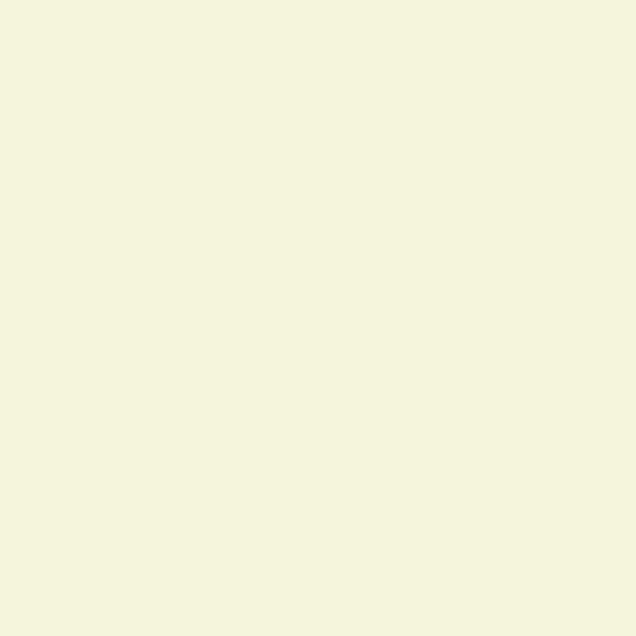

In [36]:
max_level_1_value = mcts.get_max_value_level_1()


fig, ax = p_utils.init_3d_figure(name="Level wise 1")

# nodes = mcts.infeasible_sub_nodes[0]
# nodes = mcts.history_level_1_dict[4]['nodes']
j, nodes = mcts.get_max_value_nodes_level_1()

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('grasp_poses')
    if grasp:
        grasp = grasp[0]['grasp']
    else:
        print("Here doesn't have grasp")
        
        mcts.rearr_action.scene_mngr.render_objects(ax)
        p_utils.plot_basis(ax)
        mcts.rearr_action.show()
        break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

각 node에서 생성한 grasp을 inverse kinematics를 풀어보자 


엄청 쉬워보이는 자세인데 왜 IK 실패를 할까

In [39]:
def show_curernt_scene(q, pose):
    fig, ax = p_utils.init_3d_figure(name="Level wise 1")
    
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(q)
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)
    
    mcts.rearr_action.scene_mngr.set_gripper_pose(pose)
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

여기서 실패가 나는게 말이 안됨..

In [40]:
default_thetas = mcts.rearr_action.scene_mngr.scene.robot.init_qpos

for _, i in enumerate(nodes):
    if _ < 1:
        continue
    if _%2 == 1:
        continue
        
    print("Current state node num : ",i)
    print("Current state is came from last action")
    
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*_-1]]['state'])

    last_action_node = mcts.tree.nodes[nodes[2*_+1]]
    current_state_node = mcts.tree.nodes[i]
    
    print(current_state_node['action']['pre_grasp'])
    pre_grasp_pose = current_state_node['action']['pre_grasp']
    grasp_pose = current_state_node['action']['grasp']
    post_grasp_pose = current_state_node['action']['post_grasp']
    
    pre_release_pose = current_state_node['action']['pre_release']
    release_pose = current_state_node['action']['release']
    post_release_pose = current_state_node['action']['post_release']
    
    obj_release_pose = current_state_node['action']['table']
    # Set Scene
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(default_thetas)
    rearr_obj_name = current_state_node['state'].rearr_obj_name
    rearr_default_pose = current_state_node['state'].rearr_obj_default_pose
    print("rearr_obj_name : ", rearr_obj_name)
    
    mcts.rearr_action.scene_mngr.set_object_pose(rearr_obj_name, rearr_default_pose)

    show_curernt_scene(default_thetas ,pre_grasp_pose)
    print("default 부터 Pre grasp까지 IK 품")
    
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
            default_thetas, pre_grasp_pose, max_iter=100
        )
    
    show_curernt_scene(goal_q, grasp_pose)
    print("pre_grasp 부터 grasp까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, grasp_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, post_grasp_pose)
    print("grasp 부터 post_grasp까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, post_grasp_pose, max_iter=100
    )
    
    mcts.rearr_action.scene_mngr.set_robot_eef_pose(default_thetas)

    mcts.rearr_action.scene_mngr.set_object_pose(rearr_obj_name, obj_release_pose)

    show_curernt_scene(default_thetas, post_release_pose)
    print("default 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        default_thetas, pre_release_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, release_pose)
    print("release 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, release_pose, max_iter=100
    )
    
    show_curernt_scene(goal_q, post_release_pose)
    print("post_release 부터 post_release까지 IK 품")
    goal_q = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        goal_q, release_pose, max_iter=100
    )
    
    break

Current state node num :  10
Current state is came from last action
[[ 1.7347235e-18  3.7369016e-01  9.2755359e-01  2.7714780e-01]
 [-4.5109000e-02  9.2660940e-01 -3.7330979e-01 -1.5398476e-01]
 [-9.9898207e-01 -4.1841015e-02  1.6856790e-02  8.5422677e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


KeyError: 'pre_release'

In [41]:
########## level 1 ##########
if mcts.history_level_2_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

In [68]:
mcts.tree.nodes[172]['action']['rearr_poses'][0][0]

{'release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.6695346 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3249112 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.85591245],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'pre_release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.6695346 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3249112 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.90591246],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32),
 'post_release': array([[-0.035319  ,  0.49304995, -0.8692838 ,  0.7129988 ],
        [ 0.02806048, -0.8689943 , -0.49402586,  0.3496125 ],
        [-0.9989821 , -0.04184102,  0.01685679,  0.85506964],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32)}

# Pick action 사용하는 버전 전용 디버깅

nodes [0, 1, 29, 136, 137, 139, 211, 214, 215, 218, 219, 223, 224, 225, 231, 236, 237, 238, 243, 247, 248, 251, 255, 258, 259, 260, 267, 268, 269]
1
136
139
214
218
223
225
236
238
247
251
258
260
268


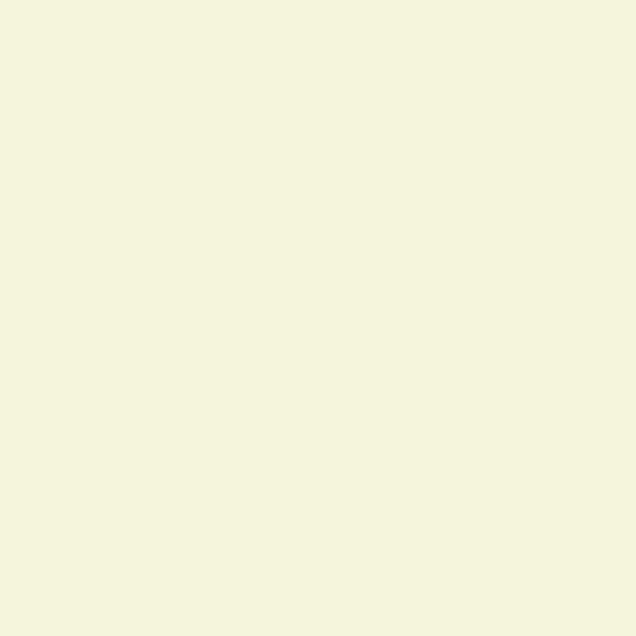

In [10]:
max_level_1_value = mcts.get_max_value_level_1()

fig, ax = p_utils.init_3d_figure(name="Level wise 1")

j, nodes = mcts.get_max_value_nodes_level_1()

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    print(nodes[2*(i)+1])
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    action_type = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('type')
    if action_type == 'pick':
        grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('grasp_poses')
        if grasp:
            grasp = grasp[0]['grasp']
        else:
            print("Here doesn't have grasp")
            mcts.rearr_action.scene_mngr.render_objects(ax)
            p_utils.plot_basis(ax)
            mcts.rearr_action.show()
            break
    if action_type == 'rearr':
        grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('action').get('rearr_poses')[0]
        if grasp:
            grasp = grasp[0].get('release')
        else:
            print("Here doesn't have grasp")

            mcts.rearr_action.scene_mngr.render_objects(ax)
            p_utils.plot_basis(ax)
            mcts.rearr_action.show()
            break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [9]:
max_value_nodes = mcts.get_minimum_cost_node()

## Save path 

In [10]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(max_value_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [11]:
for i in max_value_nodes:
    if not mcts.tree.nodes[i]['level1_5']:
        print("Error 1.5", i)
for i in max_value_nodes:
    if not mcts.tree.nodes[i]['level2']:
        print("Error 2", i)
        

Error 1.5 0
Error 1.5 4
Error 1.5 66
Error 1.5 122
Error 1.5 124
Error 1.5 127
Error 1.5 129
Error 1.5 131
Error 1.5 132
Error 1.5 134
Error 1.5 500
Error 1.5 502
Error 1.5 503
Error 1.5 506
Error 1.5 507
Error 1.5 509
Error 1.5 510
Error 1.5 511
Error 1.5 518
Error 1.5 519
Error 1.5 520
Error 1.5 522
Error 1.5 525
Error 1.5 529
Error 1.5 530


0 scene
100 scene
200 scene
300 scene
400 scene
500 scene
600 scene
700 scene
800 scene
900 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


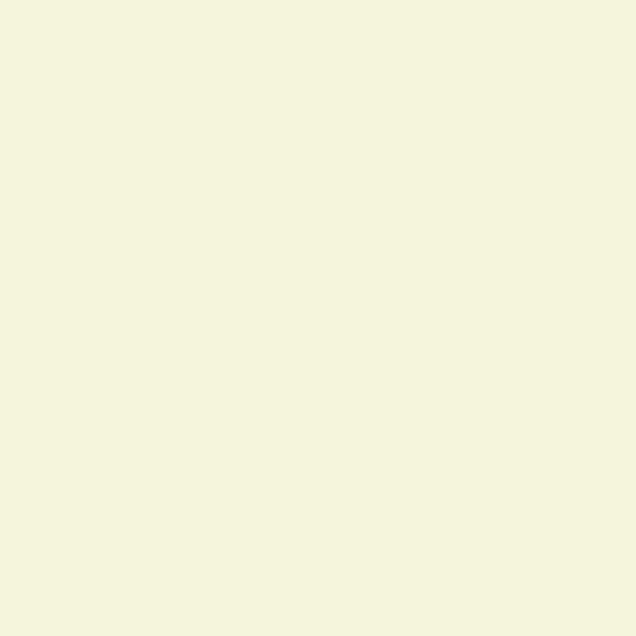

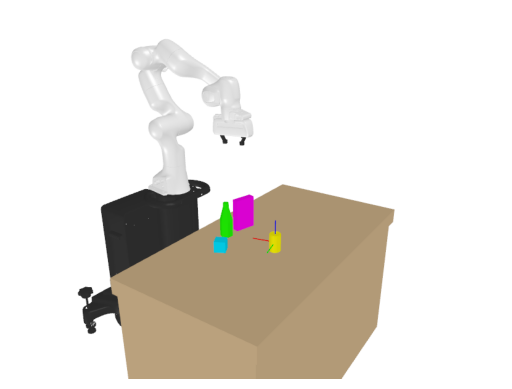

In [12]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="pick_rearrangement1_using_pick_action_minimum_cost_nodes",
)


In [20]:
count = 0
for i in mcts.tree.nodes:
    if mcts.tree.nodes[i]['visit']>1:
        count += 1
count

24

In [7]:
count = 0
for i in mcts.tree.nodes:
    if mcts.tree.nodes[i]['visit']>1:
        count += 1
count

17

In [30]:
for i in raz

{'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7fda17004a00>,
 'action': {'type': 'pick',
  'pick_obj_name': 'can0',
  'grasp_poses': [{'grasp': array([[ 0.        ,  0.59427848,  0.80425934,  0.38289493],
           [ 0.00525198,  0.80424825, -0.59427028, -0.17083556],
           [-0.99998621,  0.00422396, -0.00312114,  0.86611772],
           [ 0.        ,  0.        ,  0.        ,  1.        ]]),
    'pre_grasp': array([[ 0.        ,  0.59427845,  0.80425936,  0.30246902],
           [ 0.00525198,  0.8042483 , -0.5942703 , -0.11140853],
           [-0.99998623,  0.00422396, -0.00312114,  0.8664298 ],
           [ 0.        ,  0.        ,  0.        ,  1.        ]],
          dtype=float32),
    'post_grasp': array([[ 0.        ,  0.59427845,  0.80425936,  0.38289493],
           [ 0.00525198,  0.8042483 , -0.5942703 , -0.17083555],
           [-0.99998623,  0.00422396, -0.00312114,  0.96611774],
           [ 0.        ,  0.        ,  0.        ,  1.        ]],
          dtype

In [28]:
nodes = [0, 3, 10, 172, 173, 175, 180, 388, 389, 392, 591, 592, 593, 594, 598, 601, 602, 604, 607, 609, 610]

In [33]:
for i in nodes:
    print(mcts.tree.nodes[i]["level2"])

True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False



# Level 1에서 무조건 좋아질 조합 찾고 Path 계산해도 Cost가 무조건 좋아져야하는데 안됨. 

분석  : 이미 성공한 list에서 cost 계산


In [62]:
mcts.get_best_node()

[0, 1, 82, 84, 88, 94, 1254, 1256, 1473, 1476, 1478]

In [63]:
max_value_nodes

[0, 4, 205, 206, 706, 709, 1608, 1610, 1614, 1618, 1619]

In [20]:
def get_minimum_cost_node():
    min_cost = 100
    min_cost_nodes = []
    for i, n in mcts.history_level_2_dict.items():
        cost = 0
        print(i,n)
        for n_num in n['nodes']:
            cost += mcts.tree.nodes[n_num].get('cost')
        if min_cost > cost:
            min_cost = cost
            min_cost_nodes = n['nodes']
    return min_cost_nodes
        

In [21]:
get_minimum_cost_node()

0 {'nodes': [0, 7, 446, 449, 644, 645, 650, 654, 656, 661, 662, 664, 668, 669, 674, 678, 679, 682, 684], 'value': 8.053283}
1 {'nodes': [0, 7, 446, 449, 644, 647, 802, 804, 808, 812, 814, 818, 819, 822, 823, 825, 828, 832, 833, 837, 838], 'value': 8.525124}
2 {'nodes': [0, 7, 446, 449, 644, 648, 839, 843, 845, 846, 849], 'value': 14.897667}
3 {'nodes': [0, 7, 446, 449, 644, 648, 839, 841, 1193, 1194, 1196], 'value': 14.938767}
4 {'nodes': [0, 7, 446, 450, 452, 454, 1487, 1490, 1492], 'value': 14.938767}


[0, 7, 446, 450, 452, 454, 1487, 1490, 1492]